In [2]:
from torchvision import datasets, transforms

train_data = datasets.MNIST(
	root="data",
	train=True,
	download=True,
	transform=transforms.ToTensor()
)

test_data = datasets.MNIST(
	root="data",
	train=False,
	download=True,
	transform=transforms.ToTensor()
)

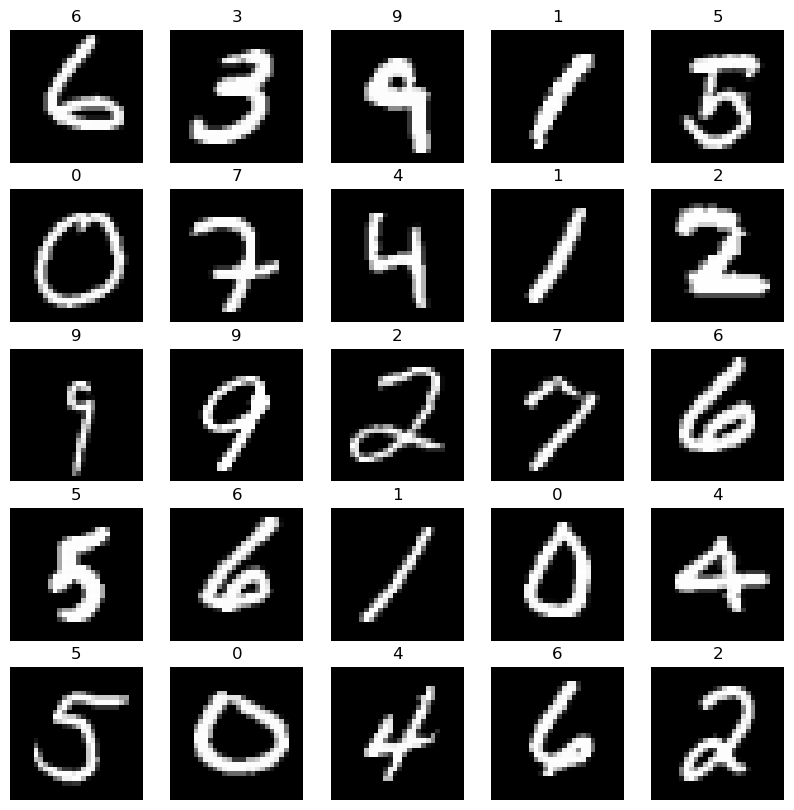

In [3]:
from matplotlib import pyplot as plt
from torch import randint

fig = plt.figure(figsize=(10, 10))
rows,cols = 5, 5
for i in range(1,26):
	rnd = randint(0,len(train_data),(1,)).item()
	img, lbl = train_data[rnd]
	img = img.squeeze()
	fig.add_subplot(rows, cols, i)
	plt.imshow(img, cmap="gray")
	plt.title(lbl)
	plt.axis(False)

In [4]:
import torch

batch_size= 32
train_loader = torch.utils.data.DataLoader(
	dataset=train_data,
	batch_size=batch_size,
	shuffle=True
)
test_loader = torch.utils.data.DataLoader(
	dataset=test_data,
	batch_size=batch_size,
	shuffle=False
)
len(train_loader), len(test_loader)

(1875, 313)

In [5]:
from torch import nn
class NumberClassifier(nn.Module):
	def __init__(self):
		super().__init__()
		self.stack = nn.Sequential(
			nn.Flatten(),
			nn.Linear(in_features=28*28, out_features=28),
			nn.ReLU(),
			nn.Linear(in_features=28, out_features=28),
			nn.ReLU(),
			nn.Linear(in_features=28, out_features=10)
		)

	def forward(self, x: torch.Tensor) -> torch.Tensor :
		return self.stack(x)

In [6]:
mdl = NumberClassifier()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
	params=mdl.parameters(),
	lr=0.01
)
def acc_fn(preds: torch.Tensor, target: torch.Tensor) -> float:
	return torch.eq(preds.argmax(dim=1),target).sum().item()/len(target)

In [7]:
epochs = 1

for epoch in range(epochs):
	for batch, (x,y) in enumerate(train_loader):
		mdl.train()

		preds = mdl(x)
		loss = loss_fn(preds, y)
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()


		if batch%50==0:
			mdl.eval()
			with torch.inference_mode():
				total_acc = 0
				total_loss = 0
				for test_x, test_y in test_loader:
					test_preds = mdl(test_x)
					total_acc += acc_fn(test_preds, test_y)
					total_loss += loss_fn(test_preds, test_y)
				total_acc /= len(test_loader)/100
				total_loss /= len(test_loader)

				print(f"epoch:{epoch:<6}batch:{batch:<6}accuracy:{total_acc:.2f}{'%':<6}loss:{total_loss:.3f}")

epoch:0     batch:0     accuracy:10.04%     loss:2.303
epoch:0     batch:50    accuracy:12.52%     loss:2.287
epoch:0     batch:100   accuracy:17.82%     loss:2.268
epoch:0     batch:150   accuracy:19.38%     loss:2.244
epoch:0     batch:200   accuracy:25.46%     loss:2.213
epoch:0     batch:250   accuracy:34.33%     loss:2.174
epoch:0     batch:300   accuracy:43.84%     loss:2.125
epoch:0     batch:350   accuracy:47.23%     loss:2.062
epoch:0     batch:400   accuracy:53.19%     loss:1.982
epoch:0     batch:450   accuracy:53.78%     loss:1.882
epoch:0     batch:500   accuracy:58.10%     loss:1.761
epoch:0     batch:550   accuracy:63.56%     loss:1.619
epoch:0     batch:600   accuracy:68.47%     loss:1.474
epoch:0     batch:650   accuracy:69.26%     loss:1.342
epoch:0     batch:700   accuracy:72.35%     loss:1.220
epoch:0     batch:750   accuracy:74.68%     loss:1.110
epoch:0     batch:800   accuracy:76.99%     loss:1.016
epoch:0     batch:850   accuracy:77.19%     loss:0.938
epoch:0   